#**Análise de Crédito**

**Resumo da base de dados (extraída do Kaggle)**

* Este projeto simula um dos diversos problemas encontrados no âmbito financeiro, sendo ele a inadimplência, cuja preocupação está voltada para o cliente e sua situação financeira para com a empresa responsável, por exemplo, pela concessão de crédito e afins. Posto isso, este projeto contará com um processo completo de análise de dados, a fim de entender as motivações e "comportamentos" que a inadimplência apresenta.
* Abaixo está a descrição das colunas do dataset.

Base de dados extraídos do site do Kaggle e disponível no link:https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv





##**1.Conhecendo os dados**

**Descrição dos Dados**

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |

In [24]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [10]:
# Importando a base de dados - com a função do pandas read_csv é possivel carregar os dados e iniciar as análises

dados = "/content/drive/MyDrive/Cases - Dados/Problema de Negócio/Análise de Dados - Financeiros/dataset_credito.csv"

df = pd.read_csv(dados, na_values="na")
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [11]:
# A função describe permite a visualização dos dados de forma estastistica, com informações de média, desvio padrão, quartis e etc.

df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,10127.0,NaN,NaN,NaN,739177606.333663,36903783.450231,708082083.0,713036770.5,717926358.0,773143533.0,828343083.0
default,10127.0,NaN,NaN,NaN,0.16066,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,NaN,NaN,NaN,46.32596,8.016814,26.0,41.0,46.0,52.0,73.0
sexo,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependentes,10127.0,NaN,NaN,NaN,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
escolaridade,8608,5,mestrado,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
estado_civil,9378,3,casado,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salario_anual,9015,5,menos que $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tipo_cartao,10127,4,blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meses_de_relacionamento,10127.0,NaN,NaN,NaN,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0


In [12]:
# A função info() permite visualizar como os dados estão no dataframe, se possuem valores nulos, quantidade de linhas preenchidas e etc.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

* Contudo a base de dados parece ser bem rica de informações, uma forma de ter uma breve informação de comportamento dos dados e a função df.corr() que analisa o quanto uma variável se correlaciona com a outra.

In [16]:
df.corr()

<ipython-input-16-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,qtd_transacoes_12m
id,1.000000,-0.046430,0.007613,0.006772,0.134588,0.006907,0.005694,0.005729,-0.002961
default,-0.046430,1.000000,0.018203,0.018991,0.013687,-0.150005,0.204491,0.152449,-0.371403
idade,0.007613,0.018203,1.000000,-0.122254,0.788912,-0.010931,-0.018452,0.054361,-0.067097
dependentes,0.006772,0.018991,-0.122254,1.000000,-0.103062,-0.039076,-0.040505,-0.010768,0.049912
meses_de_relacionamento,0.134588,0.013687,0.788912,-0.103062,1.000000,-0.009203,-0.010774,0.074164,-0.049819
qtd_produtos,0.006907,-0.150005,-0.010931,-0.039076,-0.009203,1.000000,0.055203,-0.003675,-0.241891
iteracoes_12m,0.005694,0.204491,-0.018452,-0.040505,-0.010774,0.055203,1.000000,0.029493,-0.152213
meses_inativo_12m,0.005729,0.152449,0.054361,-0.010768,0.074164,-0.003675,0.029493,1.000000,-0.042787
qtd_transacoes_12m,-0.002961,-0.371403,-0.067097,0.049912,-0.049819,-0.241891,-0.152213,-0.042787,1.000000


* Com base na função de correlação as variaveis meses de relacionamento e idade possuem uma correlação boa, será que pode ser um insight a ser observado?

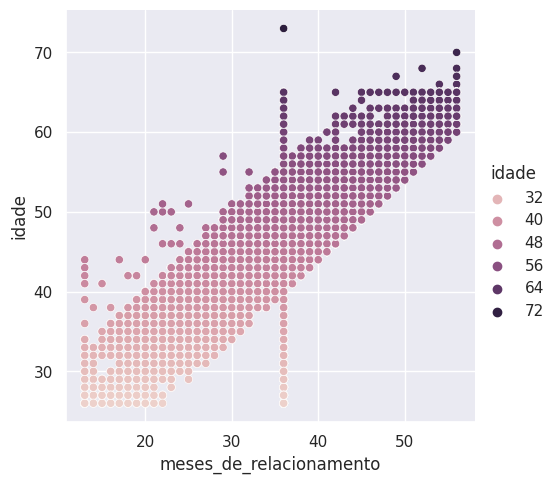

In [43]:
from pandas.core.frame import collections
from matplotlib import colors
sns.relplot(data=df, x="meses_de_relacionamento", y="idade", hue ="idade")

* Informação que faz sentido com essa análise, e que quanto mais as pessoas vão adquirindo idade, é natural elas terem um relacionamento mais duradouro, pode ser advento de um casamento e etc.

* Conforme percebemos acima, a base de dados possui muitos elementos a serem analisados e será necessário realizar uma limpeza e manipulação de dados com o objetivo de relizar uma análise profunda nos dados.

##**2.Limpeza dos dados**